In [2]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt
plt.style.use("dark_background")


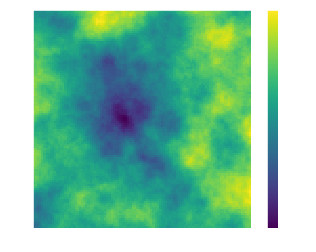

In [19]:
n_xy = 104;
opds = np.asarray(np.load("von-karman_dome-seeing_104.pkl",allow_pickle=True))
plt.imshow(opds[0,:].reshape(-1,104)*1e6);
plt.colorbar();

In [55]:
x = (np.arange(n_xy) - (n_xy-1)/2)*0.25
y = (np.arange(n_xy) - (n_xy-1)/2)*0.25
ui = (np.arange(512) - 511/2)*25.5/512
[xi,yi] = np.meshgrid(ui,ui,indexing='ij')
xyi = np.vstack([xi.ravel(),yi.ravel()]).T


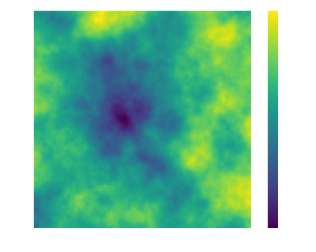

In [59]:
interp = RegularGridInterpolator((x, y), opds[0,...].reshape(-1,n_xy),method='linear')
opd_i = interp(xyi)
plt.imshow(opd_i.reshape(-1, 512)*1e6)
plt.colorbar()


In [61]:
opd_i = []
for k in range(1000):
    interp = RegularGridInterpolator(
        (x, y), opds[k, ...].reshape(-1, n_xy), method='linear')
    opd_i += [interp(xyi).flatten(order='F').tolist()]


In [ ]:
import pickle
with open("von-karman_dome-seeing_104-512.pkl","wb") as f:
    pickle.dump(opd_i,f)
